# L'algorithme de descente de gradient 

## 1. Le cas d'une fonctionnelle quadratique
 
Tout d'abord, nous appliquons la méthode à une fonctionnelle quadratique :
\begin{equation}
f(x) = \frac{1}{2} x^T A x + b^T x + c, \quad \text{pour } x \in \mathbb{R}^N
\end{equation}
avec
$A$ une matrice réelle $N\times N$, symétrique définie positive, $b\in\mathbb{R}^N$ et $c\in \mathbb{R}$. 

**Question 1.** Calculez le gradient et la matrice Hessienne de $f$.

**Question 2.** En déduire que $f$  est $\gamma$-convexe.

**Question 3.** Montrez que $f$ atteint son minimum sur $\mathbb{R}^N$ en un seul point $x^*$. Donnez une caractérisation de ce point. 

### 1.1 L'algorithme de descente de gradient à pas optimal

Soit $f$ une fonction convexe et coercive de classe $C^1$ sur $\mathbb{R}^N$. L'algorithme de descente de gradient à pas optimal est défini comme suit. 

Soit $x^0\in \mathbb{R}^N$ (on essaie de choisir $x^0$ proche de $x^*$, en l'absence d'indication on prend $x^0=0$). 

Ensuite, pour $k=0,1,2,\ldots\ $ jusqu'à convergence, répéter : 

$$
\left|
\begin{array}{lcl}
d^k& \longleftarrow & -\nabla f(x^k),\\
\alpha_k &\longleftarrow &\mathop{argmin}_{t>0} f(x^k + td^k),\\ 
x^{k+1}&\longleftarrow &x^k+\alpha_k d^k
\end{array}
\right.
$$

**Question 4.** Proposez un critère d'arrêt pour l'algorithme qui utilise la caractérisation de la question **3**. 

*Remarque :** En général, on ne sait pas calculer $\alpha_k$ et en pratique, la deuxième étape est remplacée par une recherche approchée. Cependant, lorsque $f$ est quadratique, le calcul de $\alpha_k$ est ``facile''. 

**Question 5.** Dans le cas de la fonction quadratique (1), explicitez $d^k$ et $\alpha_k$ comme fonctions de $A$, $x^k$ et $b$. 

Maintenant, nous spécifions $N=2$ et
$$ A=\binom{C\quad 0}{0\quad 1},\quad C\ge 1,\quad b=0,\quad c=0.$$
**Question 6.** Quel est l'infimum de $f$ sur $\mathbb{R}^2$ dans ce cas ? Donner $x^*$. 

**Question 7.** Deux fonctions sont données ci-dessous :
- une fonction qui dessine un champ de vecteur donné par une application $F$. À titre d'exemple, elle est appliquée au champ de vecteurs $G(x,y)=(x, 8y)$ dans la boîte $[-8,8]\times[-2.1,2.1]$.
- une fonction qui dessine quelques lignes de niveau d'une fonction $f$. Elle est appliquée à $g(x,y)=\dfrac{x^2+8x^2}2$ toujours dans la boîte $[-8,8]\times[-2.1,2.1]$ avec 8 lignes de niveaux $g=0$, $g=4$, $\dots$, $g=28$.

Notez que $G=\nabla g$. Qu'observez-vous ? 

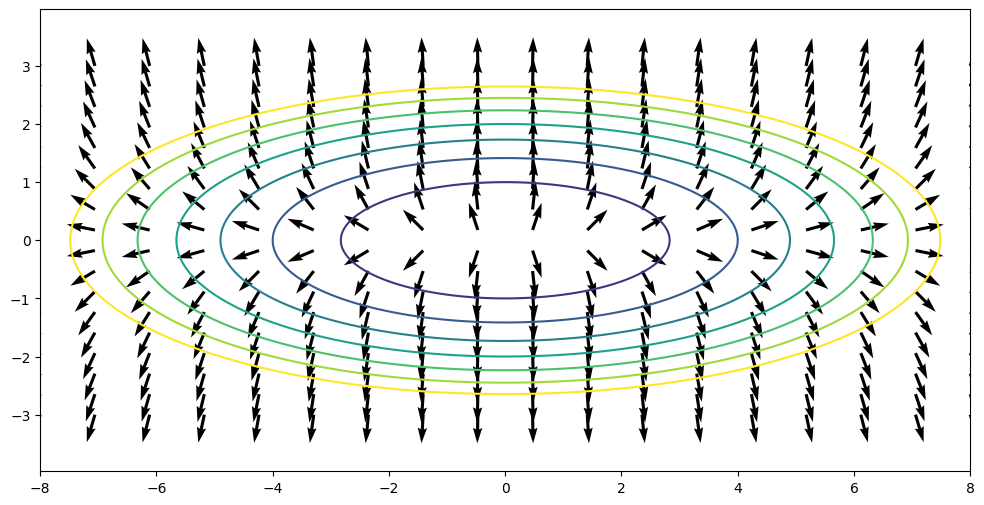

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

def draw_vector_field(F, xmin, xmax, ymin, ymax, N=20):
    X = np.linspace(xmin, xmax, N)  # coordonnes X et Y
    Y = np.linspace(ymin, ymax, N)  # des points de la grille
    U, V = F(*np.meshgrid(X, Y))  # vector field
    M = np.hypot(U, V)  # Normes des (U[i],V[i])
    M[M == 0] = 1  # évite la division par 0
    U /= M  # Normalisations de U
    V /= M  # ...  et de V
    return plt.quiver(X, Y, U, V, angles='xy')

def level_lines(f, xmin, xmax, ymin, ymax, levels, N=500):
    x = np.linspace(xmin, xmax, N)
    y = np.linspace(ymin, ymax, N)
    z = f(*np.meshgrid(x, y))
    level_l = plt.contour(x, y, z, levels=levels)
    #plt.clabel(level_l, levels, fmt='%.1f') 


g = lambda x, y: .5*(x**2 + 8*y**2)
G = lambda x, y: np.array([x, 8*y])
%matplotlib inline
plt.figure(figsize=(12,6))
level_lines(g, -8, 8, -3, 3, np.linspace(0, 28, 8))
draw_vector_field(G,  -8, 8, -3, 3, 18)
plt.axis('equal')
plt.show()

**Question 8.** Implémentez l'algorithme de descente de gradient à pas optimal. Le point initial doit être $x^0=\binom1C$.

**Question 9.** Sur le même graphique, représentez les itérations, quelques lignes de niveau de $f$ et le champ de vecteur normalisé $\dfrac {1}{|\nabla f|}\nabla f$. 

In [2]:
# Solution 8 (Algorithme de descente)
def gradient_descent(C, eps, N_iter_max):
    A = np.array([[C, 0],
             [0, 1]])
    x = np.array((1,C))
    X= [x]
    g = lambda x: A @ x 
    g0 = g(x)
    N_iter = 1
    n0 = np.linalg.norm(g0)
    while np.linalg.norm(g(x)) >= eps* n0 and N_iter <N_iter_max:
        
        dk = - g(x)
        alpha = - np.dot(g(x),dk)/(np.dot(dk,A@dk))
        x = x + alpha*dk
        X.append(x)
        N_iter += 1
    #print(f"On a convergé en {N_iter} itérations")
    return X, N_iter

In [3]:
C = 5
X, Nb_iter = gradient_descent(C,1e-4,50)
X = np.array(X)
print(f"On a convergé en {Nb_iter} itérations")

On a convergé en 24 itérations


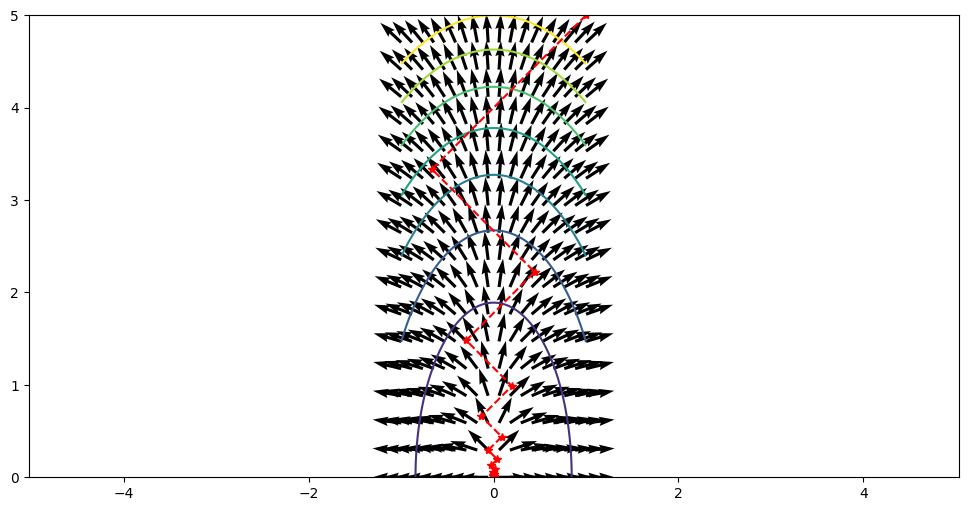

In [4]:
# Solution 9 (Représentations graphiques)

g = lambda x, y: .5*(C*x**2 + y**2)
G = lambda x, y: np.array([C*x, y])

%matplotlib inline
plt.figure(figsize=(12,6))
draw_vector_field(G,  -1, 1, 0, C, 18)
level_lines(g,-1, 1, -0, C, np.linspace(0, C**2/2, 8))
plt.plot(X[:,0], X[:,1], "--*r")
plt.axis('equal')
plt.show()

**Question 10.** Changez la valeur de $C$ de 1 à 32 ($C=1,2,4,8,16,32$). Qu'observez-vous ?

**Question 11.** Tracez le nombre d'itérations de la méthode en fonction de $C$. Faites une hypothèse. 

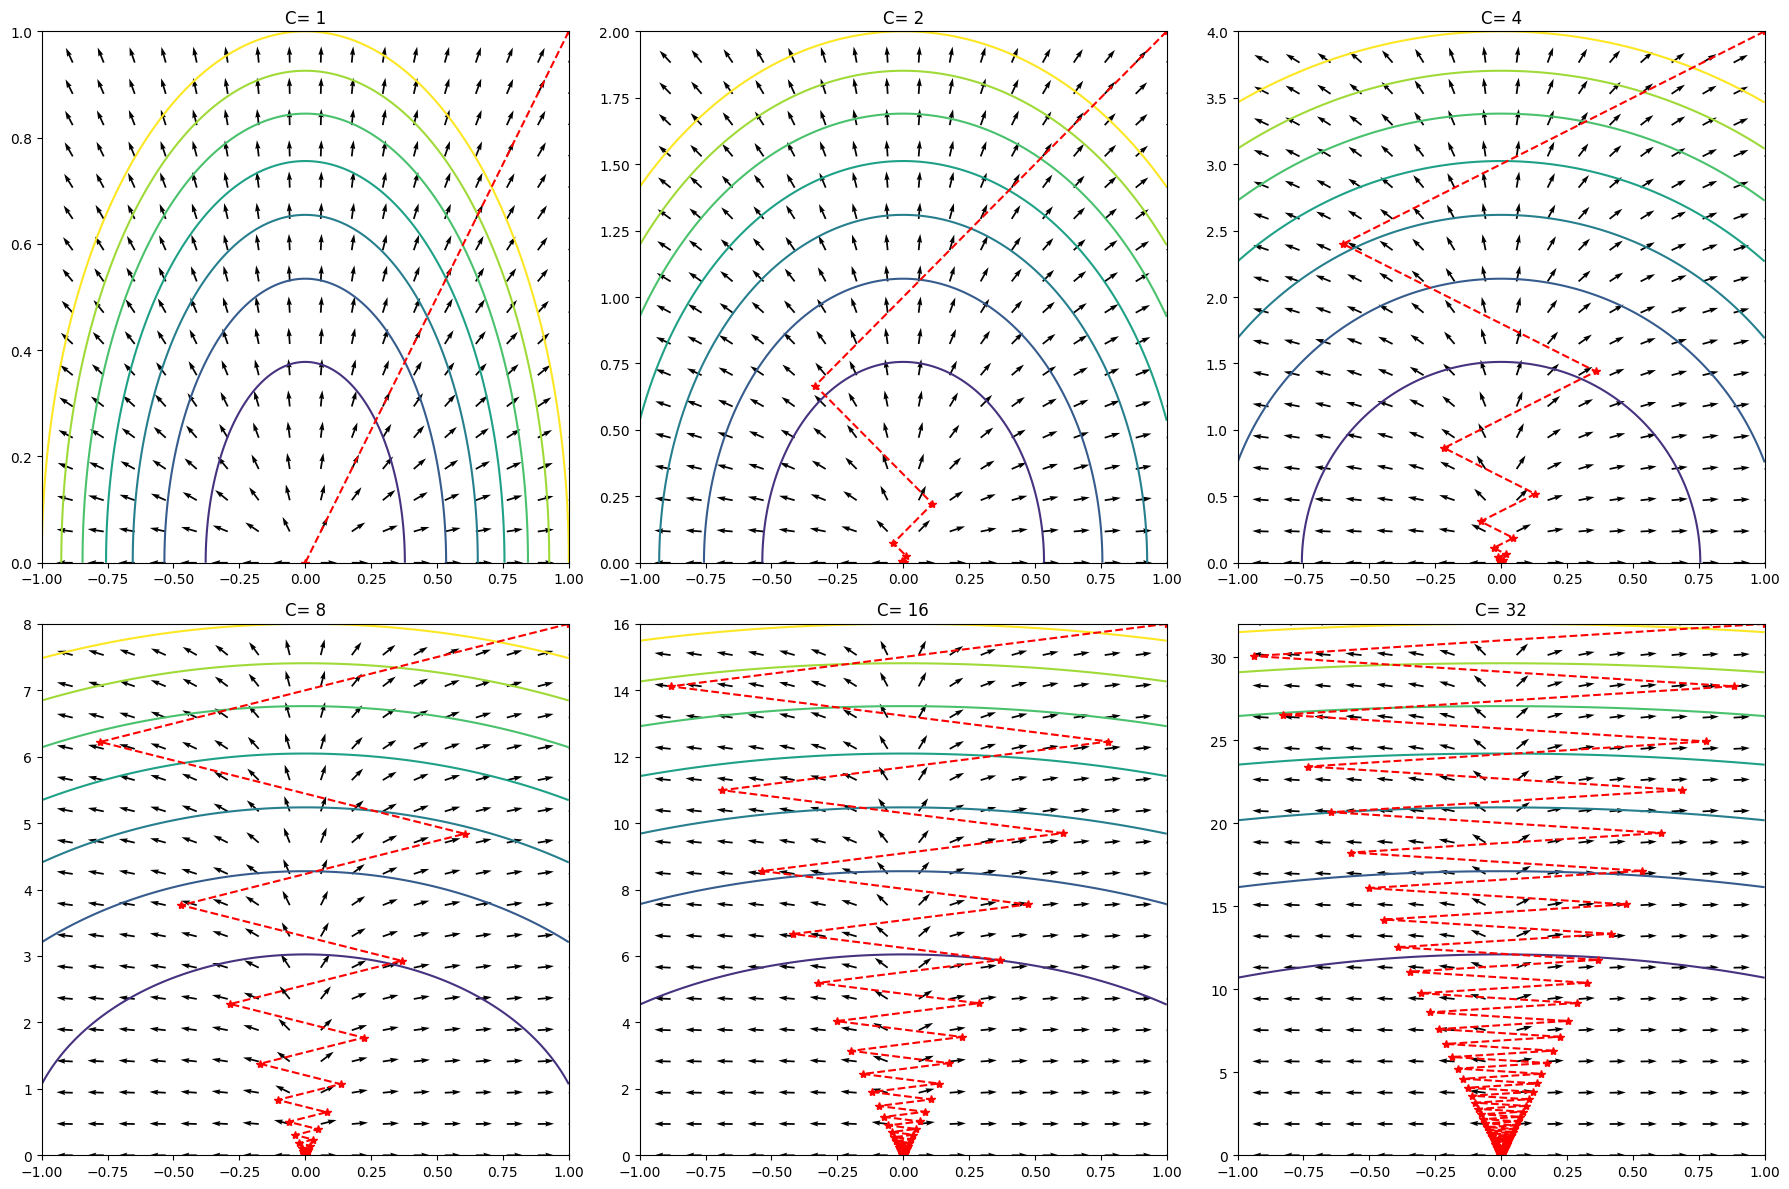

In [5]:
# Solution 10   (Calculs)
C_values = [1, 2, 4, 8, 16, 32]
iterations = 100 
liste_iter = [] 

# Créer une figure avec des subplots pour chaque valeur de C
plt.figure(figsize=(18, 12))

for i, C in enumerate(C_values, 1):
    plt.subplot(2,3,i)
    X, Nb_iter = gradient_descent(C, 1e-4, iterations)
    X = np.array(X)
    liste_iter.append(Nb_iter)
    g = lambda x, y: .5*(C*x**2 + y**2)
    G = lambda x, y: np.array([C*x, y])

    draw_vector_field(G, -1, 1, 0, C, 18)
    level_lines(g, -1, 1, -0, C, np.linspace(0, C**2/2, 8))
    plt.plot(X[:,0], X[:,1], "--*r")
    plt.title(f'C= {C}')
plt.tight_layout()
plt.show()

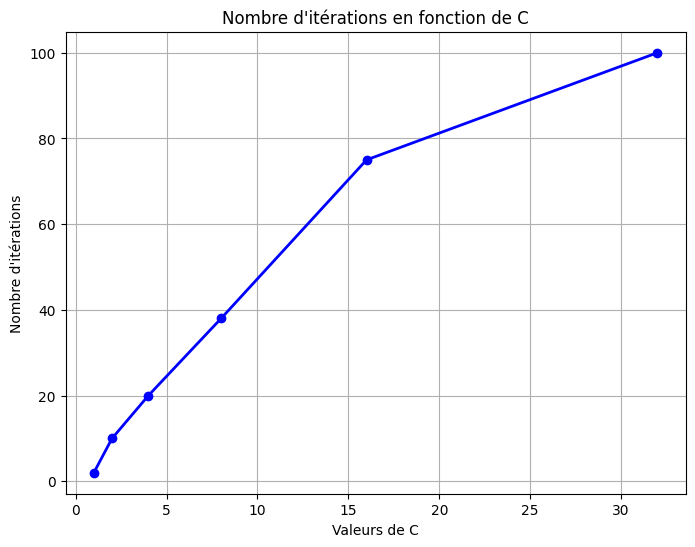

In [6]:
# Solution 11  (graphiques)
plt.figure(figsize=(8, 6))
plt.plot(C_values, liste_iter, marker='o', linestyle='-', color='b', linewidth=2)
plt.title('Nombre d\'itérations en fonction de C')
plt.xlabel('Valeurs de C')
plt.ylabel('Nombre d\'itérations')
plt.grid(True)
plt.show()

__Solution 11__ (Hypothèse sur le comportement de la méthode)

## 2. Le cas d'une fonction convexe régulière, line search. 

On considère la fonction définie par
$$
f(x,y):= \cosh(x) + \sin^2(x+y),\qquad \text{pour }z=(x,y)\in \mathbb{R}^2.
$$

**Question 12.** Montrer que les minimiseurs de $f$ sont les points de la form $(0,n\pi)$ pour $n\in\mathbb{Z}$.

Montrer que $f$ est convexe au voisinage de $z^0_*:=(0,0)$.

Nous allons appliquer un algorithme de descente de gradient avec ``line search'' à la fonction $f$. Plus précisément :

Étant donné  $z^0=(x^0,y^0)\in\mathbb{R}^2$, calculer de manière récursive, jusqu'à convergence,

$$
\left|
\begin{array}{lcl}
d^k& \longleftarrow & -\nabla f(z^k),\\
\alpha_k &\longleftarrow & \text{Line-search}\ \left(\ t\mapsto f(z^k + td^k)\ \right),\\ 
z^{k+1}&\longleftarrow &z^k+\alpha_k d^k
\end{array}
\right.
$$

Précisons la deuxième étape. On remarque d'abord que pour $t>0$,

$$
f(z^k+t d^k) \,=\, f(z^k) -t \|d^k\|^2 +o(t).
$$

En fait, si $f$ est convexe au voisinage de $z^k$, on a aussi pour $t>0$ assez petit, 

$$
f(z^k+t d^k)\, \ge\, f(z^k) -t \|d^k\|^2,
$$

donc on ne peut pas demander $f(z^k+t d^k) \,\le\, f(z^k) -t \|d^k\|^2$. 

L'idée de la *condition Armijo* est de demander un peu moins. Fixons un $c\in (0,1)$ : la condition Armijo s'écrit : 

$$
\tag{2}f(z^k+t d^k)\, \le\, f(z^k) -c\, t \|d^k\|^2.
$$

En utilisant le développement limité ci dessus, on a 

$$
\begin{array}{rcl}
f(z^k+t d^k) &=& f(z^k) -t \|d^k\|^2 +o(t)\\
   &=& f(z^k) -c\, t \|d^k\|^2 - (1-c)t\|d^k\|^2 +o(t)\\
   & = & f(z^k) -c\, t \|d^k\|^2 -t \left[(1-c)\|d^k\|^2 +o(1)\right]
\end{array}
$$

Pour $t>0$ assez petit, le terme entre crochet est positif et donc (2) est vrai.

Nous ne voulons pourtant pas choisir un $\alpha_k$ trop petit (l'algorithme calerait). Pour éviter cela, nous fixons un pas maximal $\alpha_0$ et un facteur $\beta\in(0,1)$ et nous testons successivement (2) avec $t=\alpha_0$, $t=\alpha_0\beta$, $t=\alpha_0\beta^2$, ... 

On choisi $\alpha_k=\alpha_0\beta^j$ où $j$ est le premier entier tel que $t=\alpha_0\beta^j$ vérifie (2).

Remarquez que comme $0<\beta<1$ et que (2) est vraie pour $t>0$ assez petit, cet entier existe. 

**Question 13.** Implémentez la méthode ci-dessus, avec $c=0.5$, $\beta=0.75$. Commencez par $z^0=(1,0.5)$ et $\alpha=1$. Ensuite, pour $k\ge 1$ utilisez $\alpha\leftarrow\alpha_{k-1}/\beta$.

Tout d'abord pour vous aider, la cellule suivante montre quelques ensembles de niveaux de $f$ et le champ de vecteur normalisé $\dfrac {1}{|\nabla f|}\nabla f$ au voisinage de $z^*$. 

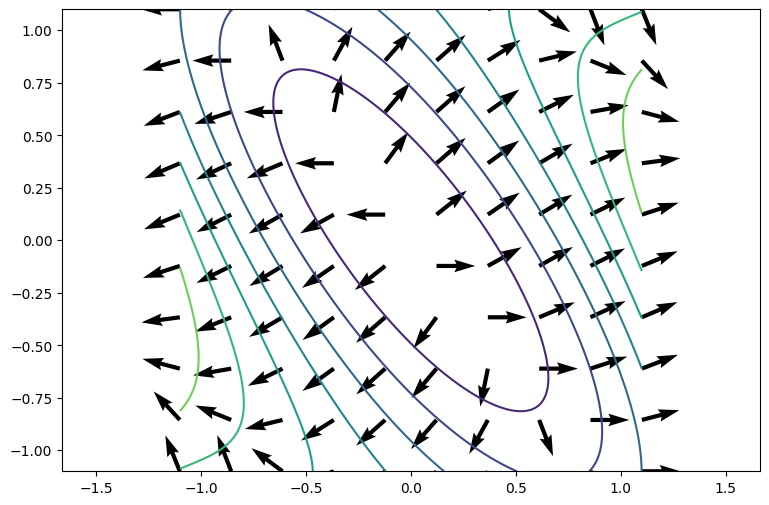

In [34]:
def draw_vector_field_2(F, xmin, xmax, ymin, ymax, N=15):
    X = np.linspace(xmin, xmax, N)  
    Y = np.linspace(ymin, ymax, N)
    U, V = F(*np.meshgrid(X, Y))  # Champ de vecteur
    M = np.hypot(U, V)  # Normes des (U[i],V[i])
    M[M == 0] = 1  # évite la division par 0
    U /= M  # normalisation de U
    V /= M  # .... et de V
    return plt.quiver(X, Y, U, V, angles='xy')

def level_lines_2(f, xmin, xmax, ymin, ymax, levels, N=500):
    x = np.linspace(xmin, xmax, N)
    y = np.linspace(ymin, ymax, N)
    z = f(*np.meshgrid(x, y))
    level_l = plt.contour(x, y, z, levels=levels)
    #plt.clabel(level_l, levels, fmt='%.1f') 

f = lambda x, y : np.cosh(x)+ np.sin(x + y)**2
df = lambda x, y : np.array([np.sinh(x) 
                             + 2*np.cos(x + y)*np.sin(x + y),
                             2*np.cos(x + y)*np.sin(x + y)])
%matplotlib inline
plt.figure(figsize=(9,6))
level_lines_2(f, -1.1, 1.1, -1.1, 1.1, np.linspace(1, 3, 10))
draw_vector_field_2(df, -1.1, 1.1, -1.1, 1.1, 10)
plt.axis('equal')
plt.show()

In [35]:
# Définition de f et df (i.e. : f')
f = lambda x, y : np.cosh(x)+ np.sin(x + y)**2
df = lambda x, y : np.array([np.sinh(x) + 2*np.cos(x + y)*np.sin(x + y), 2*np.cos(x + y)*np.sin(x + y)])

In [36]:
# Solution 13
def armijo_line_search(f, grad_f, z, d, alpha_0=1, beta=0.75, c=0.5, max_iter=100):
    alpha = alpha_0
    j = 0
    while j < max_iter:
        res_1 = f(z[0] + alpha * d[0], z[1] + alpha * d[1])
        res_2 = f(z[0], z[1]) + c * alpha * np.dot(grad_f(z[0], z[1]), d)
        if res_1 <= res_2:
            return alpha
        else:
            alpha *= beta
            j += 1
    return alpha

def gradient_descent_with_line_search(f, grad_f, z0, tol=1e-5, max_iter=100):
    z = z0
    z_list = [z0]
    for i in range(max_iter):
        grad = grad_f(z[0], z[1])
        if np.linalg.norm(grad) < tol:
            break
        direction = -grad
        alpha = armijo_line_search(f, grad_f, z, direction)
        z = z + alpha * direction
        z_list.append(z)
    return z, z_list

# Point initial
z0 = np.array([1.0, 0.5])

# Application de la descente de gradient avec recherche de ligne
result, z_results = gradient_descent_with_line_search(f, df, z0)
z_results = np.array(z_results)

print("Minimum trouvé à :", result)
print("Valeur de la fonction à ce minimum :", f(*result))

Minimum trouvé à : [-1.01695072e-05  1.26134348e-05]
Valeur de la fonction à ce minimum : 1.0000000000576823


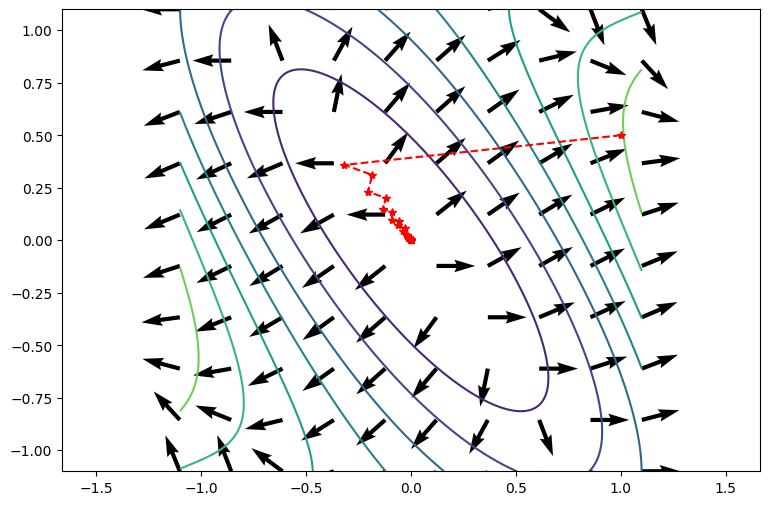

In [37]:
plt.figure(figsize=(9, 6))
level_lines_2(f, -1.1, 1.1, -1.1, 1.1, np.linspace(1, 3, 10))
draw_vector_field_2(df, -1.1, 1.1, -1.1, 1.1, 10)

# Tracé du résultat de la descente de gradient
#plt.plot(result[0], result[1], 'ro')  # Marqueur 'ro' pour indiquer le résultat
plt.plot(z_results[:,0], z_results[:,1], "--*r")

plt.axis('equal')
plt.show()

On considère maintenant la fonction définie sur $\mathbb{R}^3$ par 
$$
f(x,y,z):= \cosh(x) + \sin^2(x+y) + (y-z)^2,\qquad \text{pour }w=(x,y,z)\in \mathbb{R}^3.
$$

**Question 14.** Appliquez la méthode d'optimisation ci-dessus à cette fonction, en commençant par $w^0=(1,0.5,1)$ (avec toujours $c=0.5$, $\beta=0.75$ et $\alpha=1$ à la première itération). 

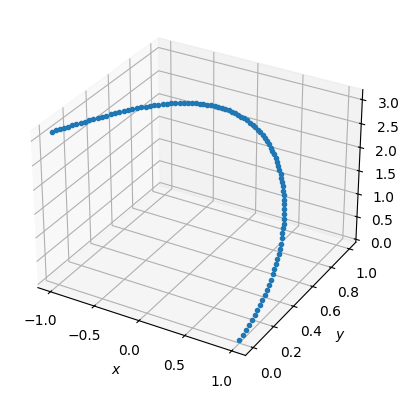

In [24]:
# Pour les plots en 3 dimensions
from mpl_toolkits.mplot3d import Axes3D

# exemple
t = np.linspace(0,np.pi,101)
x, y, z = np.cos(t), np.sin(t), t+.5*np.sin(t)**2

#ax = Axes3D(plt.figure())  # Define the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.set(xlabel=r'$x$', ylabel=r'$y$', zlabel=r'$z$')
ax.plot(x, y, z,'.')  # Plot of the trajectory
plt.show(block=True)

In [43]:
# Définition de f et df (i.e. : f')
f = lambda x, y, z : np.cosh(
    x)+ np.sin(x + y)**2 + (y - z)**2
df = lambda x, y, z : np.array(
    [np.sinh(x) + 2*np.cos(x + y)*np.sin(x + y), 
     2*np.cos(x + y)*np.sin(x + y) + 2*(y - z), 
     2*(z - y)])

In [45]:
# Solution 14 

# Solution 13
def armijo_line_search(f, grad_f, z, d, alpha_0=1, beta=0.75, c=0.5, max_iter=100):
    alpha = alpha_0
    j = 0
    while j < max_iter:
        res_1 = f(z[0] + alpha * d[0], z[1] + alpha * d[1], z[2] + alpha * d[2])
        res_2 = f(z[0], z[1], z[2]) + c * alpha * np.dot(grad_f(z[0], z[1], z[2]), d)
        if res_1 <= res_2:
            return alpha
        else:
            alpha *= beta
            j += 1
    return alpha

def gradient_descent_with_line_search(f, grad_f, z0, tol=1e-5, max_iter=100):
    z = z0
    z_list = [z0]
    for i in range(max_iter):
        grad = grad_f(z[0], z[1], z[2])
        if np.linalg.norm(grad) < tol:
            break
        direction = -grad
        alpha = armijo_line_search(f, grad_f, z, direction)
        z = z + alpha * direction
        z_list.append(z)
    return z, z_list

# Point initial
z0 = np.array([1.0, 0.5, 1])

# Application de la descente de gradient avec recherche de ligne
result, z_results = gradient_descent_with_line_search(f, df, z0)
z_results = np.array(z_results)

print("Minimum trouvé à :", result)
print("Valeur de la fonction à ce minimum :", f(*result))

Minimum trouvé à : [-1.32289197e-05  1.78422701e-05  2.07146332e-05]
Valeur de la fonction à ce minimum : 1.0000000001170357


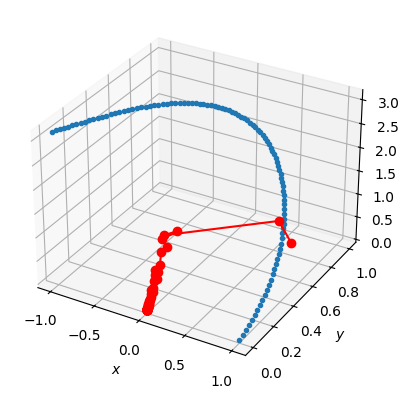

In [46]:
t = np.linspace(0,np.pi,101)
x, y, z = np.cos(t), np.sin(t), t+.5*np.sin(t)**2

#ax = Axes3D(plt.figure())  # Define the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.set(xlabel=r'$x$', ylabel=r'$y$', zlabel=r'$z$')
ax.plot(x, y, z,'.')  # Plot of the trajectory
ax.plot(z_results[:, 0], z_results[:, 1], z_results[:, 2], 'ro-', label='Trajectoire descente de gradient')  # Trajectoire de la descente de gradient

plt.show(block=True)